<img src=assets/UBA_header.png>

# **Universidad de Buenos Aires**

### Carrera de Especialización en Inteligencia Artificial
<br>

## **Proyecto final - Aprendizaje de Máquina**

### Cohorte 22 - Año 2025

## Autores
- [SIU a2208] Ariel Matias Cabello <arielmcabello@gmail.com>
- [SIU a2213] Ignacio Agustin Costarelli <agustin@costarellisa.com.ar>
- [SIU a2214] Alex Martín Curellich <alexcurellich@gmail.com>
<br>
<br>
### Este repositorio contiene el material de resolución del Trabajo práctico integrador correspondiente correspondiente a la asignatura de Aprendizaje de máquina.

___

# Índice

## 1. Análisis Exploratorio de Datos (EDA)
1.1. Revisión general del dataset  
1.2. Distribución de variables numéricas  
1.3. Distribución de variables categóricas  
1.4. Análisis de valores faltantes y duplicados  
1.5. Identificación de outliers y posibles inconsistencias  
1.6. Análisis de correlaciones entre variables  
**Resumen EDA**

## 2. Preprocesamiento y preparación de los datos
2.1. Definición de métricas y modelos a utilizar  
2.1.1. Métricas principales  
2.1.2. Contexto del problema y consecuencia de los errores  
2.1.3. Función de evaluación unificada  
2.1.4. Selección de modelos y criterios de comparación  

2.2. Preprocesamiento de datos  
2.2.1. Split inicial de datos  
2.2.2. Análisis de valores faltantes en train y test  
2.2.3. Estrategia de preprocesamiento  
2.2.4. Implementación del pipeline de preprocesamiento  
2.2.5. Aplicación de las transformaciones  
2.2.6. Preparación de la variable objetivo  
2.2.7. Mapeo de datasets preprocesados por modelo  
**Resumen del preprocesamiento**

## 3. Modelización: Construcción, entrenamiento y evaluaciones parciales
3.1. Importación de modelos y configuración inicial  
3.2. Modelo 1: Logistic Regression  
3.3. Modelo 2: Naive Bayes  
3.4. Modelo 3: Decision Tree  
3.5. Modelo 4: Random Forest  
3.6. Modelo 5: Gradient Boosting  

## 4. Evaluación de Resultados
4.1. Comparación de los modelos utilizados  
4.2. Selección del modelo más acorde


___

# DESARROLLO



# Imports y config iniciales

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

# Ingesta del dataset

In [90]:
path = pathlib.Path("dataset/one_million_mushrooms.csv")
df = pd.read_csv(path, delimiter=';')

# 1. Analisis exploratorio de datos (EDA)

Antes de abordar cualquier modelo de aprendizaje automático, resulta fundamental realizar un análisis exploratorio de los datos (EDA). Este proceso nos permite comprender la estructura del conjunto de datos, detectar posibles inconsistencias o valores faltantes, identificar relaciones entre variables y, en general, obtener una primera impresión de la información disponible. En tal sentido se llevó a cabo un análisis etructurado según las siguientes etapas:

- Revisión general del dataset
- Distribución de variables numéricas
- Distribución de variables categóricas
- Análisis de valores faltantes y duplicados
- Identificación de outliers y posibles inconsistencias
- Análisis de correlaciones entre variables

### 1.1. Revisión general del dataset

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038000 entries, 0 to 1037999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1038000 non-null  object 
 1   cap-diameter          1038000 non-null  float64
 2   cap-shape             1038000 non-null  object 
 3   cap-surface           798000 non-null   object 
 4   cap-color             1038000 non-null  object 
 5   does-bruise-or-bleed  1038000 non-null  object 
 6   gill-attachment       870000 non-null   object 
 7   gill-spacing          612000 non-null   object 
 8   gill-color            1038000 non-null  object 
 9   stem-height           1038000 non-null  float64
 10  stem-width            1038000 non-null  float64
 11  stem-root             162000 non-null   object 
 12  stem-surface          390000 non-null   object 
 13  stem-color            1038000 non-null  object 
 14  veil-type             54000 non-nu

| Columna               | Tipo    | Descripción general                                                                              | Valores posibles                                                                                                                                            |
|------------------------|---------|---------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| class                  | categ. | Clase del hongo según su toxicidad                                                                | e = comestible, p = venenoso                                                                                                                                |
| cap-diameter (cm)      | num.   | Diámetro del sombrero (píleo)                                                                      | número flotante en cm                                                                                                                                       |
| cap-shape              | categ. | Forma del sombrero                                                                                | b = campana, c = cónica, x = convexa, f = plana, s = hundida, p = esférica, o = otras                                                                        |
| cap-surface            | categ. | Textura de la superficie del sombrero                                                             | i = fibrosa, g = con surcos, y = escamosa, s = lisa, h = brillante, l = coriácea, k = sedosa, t = pegajosa, w = arrugada, e = carnosa                        |
| cap-color              | categ. | Color del sombrero                                                                               | n = marrón, b = beige, g = gris, r = verde, p = rosa, u = púrpura, e = rojo, w = blanco, y = amarillo, l = azul, o = naranja, k = negro                        |
| does-bruise-bleed      | categ. | Indica si presenta moretones o sangrado al cortarse                                              | t = sí, f = no                                                                                                                                              |
| gill-attachment        | categ. | Forma en que las laminillas se unen al tallo                                                     | a = adnada, x = adnexada, d = decurrente, e = libre, s = sinuada, p = poros, f = ninguna, ? = desconocido                                                   |
| gill-spacing           | categ. | Separación entre las laminillas                                                                 | c = cerrada, d = distante, f = ninguna                                                                                                                     |
| gill-color             | categ. | Color de las laminillas                                                                          | igual a cap-color + f = ninguna                                                                                                                            |
| stem-height (cm)       | num.   | Altura del tallo                                                                                | número flotante en cm                                                                                                                                       |
| stem-width (mm)        | num.   | Grosor del tallo                                                                                | número flotante en mm                                                                                                                                       |
| stem-root              | categ. | Forma de la base del tallo                                                                      | b = bulbosa, s = hinchada, c = en maza, u = copa, e = igual, z = rizomorfa, r = enraizada, f = plana                                                                   |
| stem-surface           | categ. | Textura de la superficie del tallo                                                              | igual a cap-surface + f = ninguna                                                                                                                          |
| stem-color             | categ. | Color del tallo                                                                                | igual a cap-color + f = ninguno                                                                                                                            |
| veil-type              | categ. | Tipo de velo                                                                                   | p = parcial, u = universal                                                                                                                                  |
| veil-color             | categ. | Color del velo                                                                                 | igual a cap-color + f = ninguno                                                                                                                            |
| has-ring               | categ. | Indica si el tallo tiene anillo                                                                | t = sí, f = no                                                                                                                                              |
| ring-type              | categ. | Tipo de anillo                                                                                 | c = telaraña, e = evanescente, r = abierto, g = surcado, l = grande, p = colgante, s = envolvente, z = zona, y = escamoso, m = móvil, f = ninguno, ? = desconocido |
| spore-print-color      | categ. | Color de la impresión de esporas                                                                | igual a cap-color                                                                                                                                          |
| habitat                | categ. | Hábitat donde crece                                                                            | g = pastos, l = hojas, m = praderas, p = senderos, h = brezales, u = urbano, w = desechos, d = bosques                                                      |
| season                 | categ. | Estación en que aparece                                                                        | s = primavera, u = verano, a = otoño, w = invierno                                                                                       

Como se puede observar en la información precedente, el dataset contiene 1.038.000 registros y 21 columnas, de las cuales 18 son categóricas y 3 numéricas (`cap-diameter`, `stem-height` y `stem-width`).<br>
<br>
La variable objetivo (`class`) indica si el hongo es comestible (`e`) o venenoso (`p`), tratándose entonces de un problema de clasificación binaria.<br>
<br>
La inspección con `df.info()` permitió confirmar que varias columnas presentan valores faltantes en diferentes proporciones. Esto nos sugiere la necesidad de tratarlos (imputación, eliminación o transformación) según su relevancia en el modelado. Este tema se abordará más adelante.

In [92]:
df.head(5)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,5.68,c,e,w,t,x,c,r,6.73,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,u
1,e,5.62,f,s,n,f,s,c,w,6.10,...,b,i,n,NaN,NaN,f,f,NaN,m,u
2,p,17.29,x,s,n,f,p,NaN,y,6.80,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3,p,6.16,b,s,n,f,NaN,NaN,w,9.33,...,NaN,s,w,NaN,NaN,t,z,NaN,d,s
4,p,4.46,o,t,n,f,NaN,c,w,0.00,...,f,f,f,NaN,NaN,f,f,n,d,u


### 1.2. Distribución de variables numéricas

In [93]:
df. describe()

,cap-diameter,stem-height,stem-width
count,1.038000e+06,1.038000e+06,1.038000e+06
mean,6.737280e+00,6.588308e+00,1.215534e+01
std,5.249366e+00,3.375367e+00,1.001048e+01
min,3.000000e-01,0.000000e+00,-2.750000e+00
25%,3.500000e+00,4.640000e+00,5.210000e+00
50%,5.880000e+00,5.960000e+00,1.018000e+01
75%,8.540000e+00,7.750000e+00,1.660000e+01
max,6.656000e+01,3.615000e+01,1.055000e+02


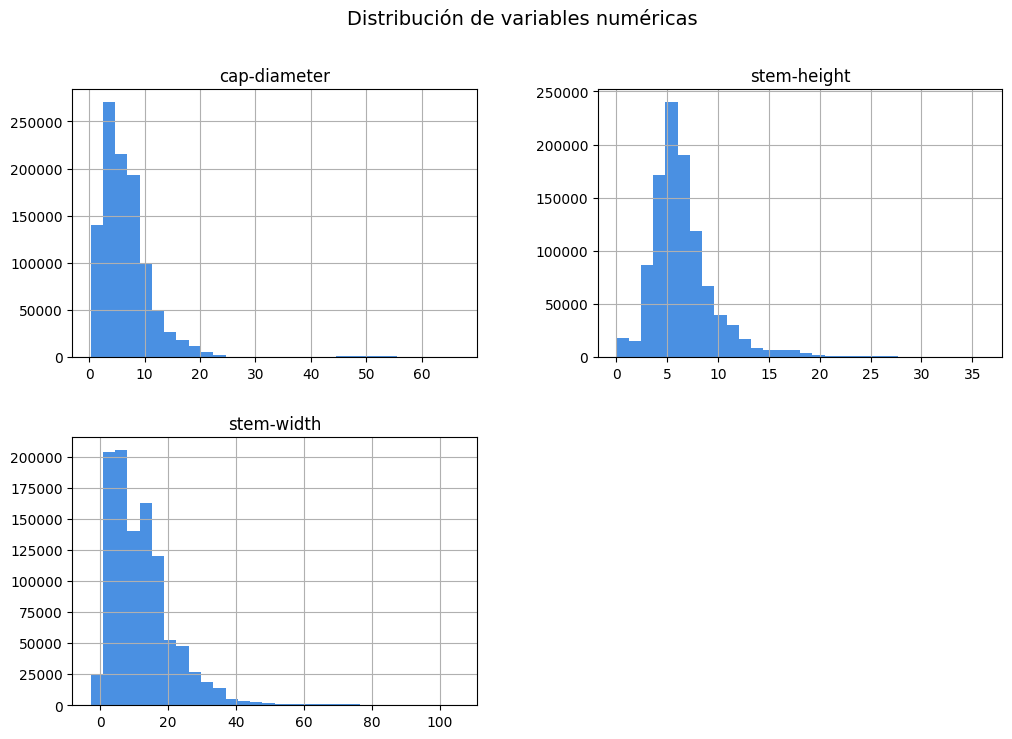

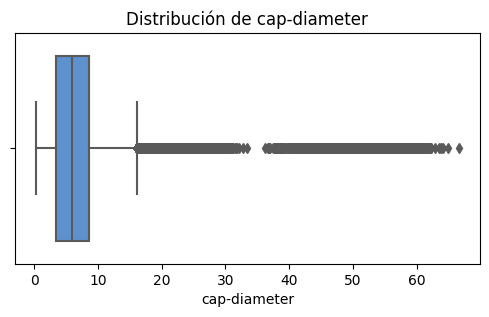

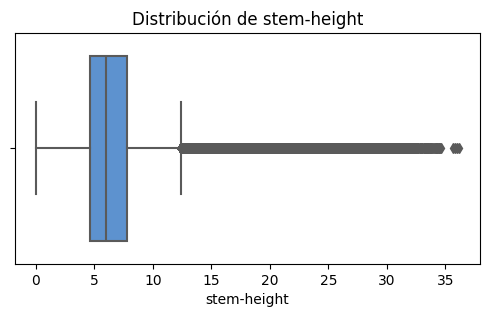

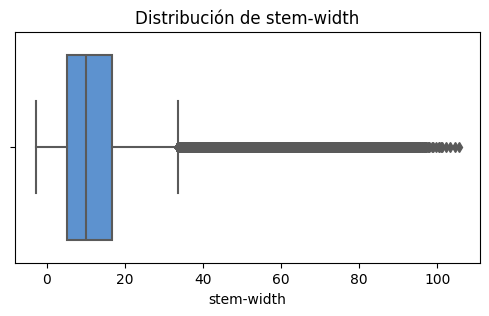

In [94]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(bins=30, figsize=(12,8), color='#4a90e2')
plt.suptitle('Distribución de variables numéricas', fontsize=14)
plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='#4a90e2')
    plt.title(f'Distribución de {col}')
    plt.show()


Como pudimos observar, el análisis numérico mostró que:

- Los valores de `cap-diameter`, `stem-height` y `stem-width` presentan una distribución sesgada positivamente (*right-skewed distribution*). Evidencian a primera vista posibles outliers.

- Se detectaron valores atípicos potenciales, como `stem-width` negativo o `stem-height` igual a cero, lo que podría indicar errores de medición o registro.

### 1.3. Distribución de variables categóricas

In [95]:
df.describe(include=['object'])

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,1038000,1038000,798000,1038000,1038000,870000,612000,1038000,162000,390000,1038000,54000,126000,1038000,996000,108000,1038000,1038000
unique,2,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4
top,p,x,t,n,f,a,c,w,b,s,w,u,w,f,f,k,d,a
freq,576000,457326,138461,415920,858000,216055,420000,314585,54000,101929,389907,54000,92989,780000,822000,36003,751259,514753


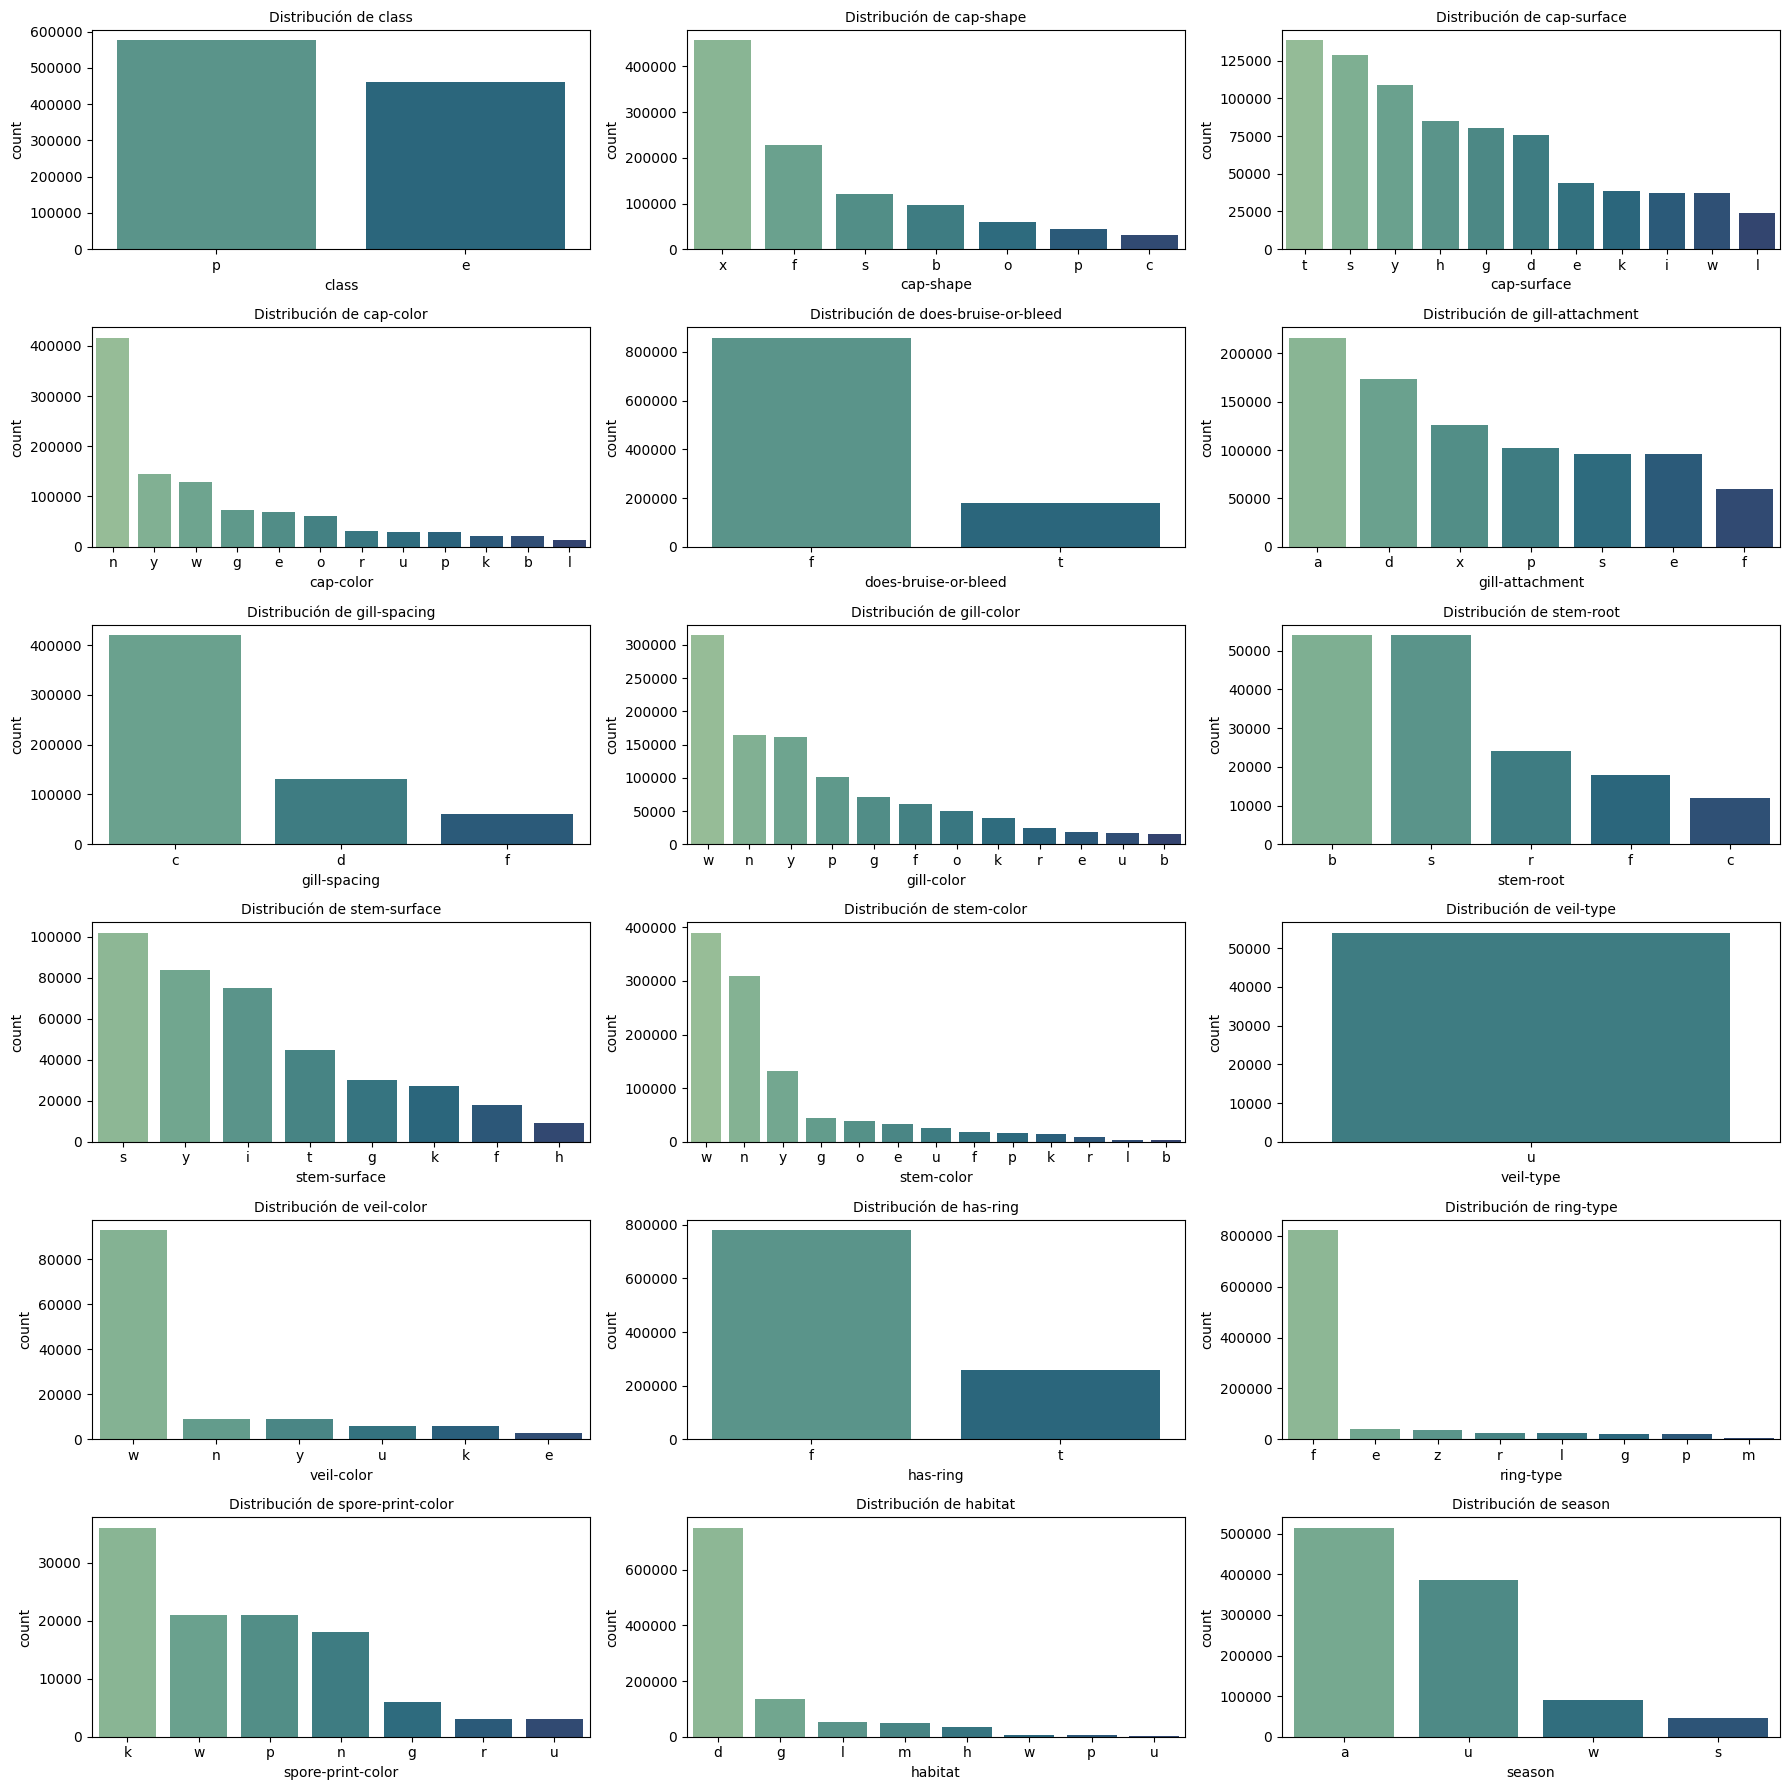

In [96]:
categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(6, 3, figsize=(18, 18))
axes = axes.flatten() 


for i, col in enumerate(categorical_cols[:18]): 
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='crest', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=0)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Las estadísticas de las variables categóricas mostraron:
- Varios atributos con alta cardinalidad (por ejemplo, `cap-color` con 12 categorías y `stem-color` con 13).

- La variable `veil-type` tiene una sola categoría (“u”) y gran cantidad de faltantes, lo que indica que no aporta información, por lo tanto, podría eliminarse del análisis.

- **La distribución de la variable `class` (target) está levemente desbalanceada, con 57.6% de hongos venenosos y 42.4% comestibles, algo a tener en cuenta en la etapa de modelado.**

### 1.4. Análisis de valores faltantes y duplicados

In [97]:
# Busqueda de "?" como valores faltantes
(df == "?").any()

 # Reemplazo de "?"" por NaN (comentado por ahora porque no hay)
# df = df.replace('?', np.nan)

class                   False
cap-diameter            False
cap-shape               False
cap-surface             False
cap-color               False
does-bruise-or-bleed    False
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-root               False
stem-surface            False
stem-color              False
veil-type               False
veil-color              False
has-ring                False
ring-type               False
spore-print-color       False
habitat                 False
season                  False
dtype: bool

In [98]:
df.isnull().sum()

class                        0
cap-diameter                 0
cap-shape                    0
cap-surface             240000
cap-color                    0
does-bruise-or-bleed         0
gill-attachment         168000
gill-spacing            426000
gill-color                   0
stem-height                  0
stem-width                   0
stem-root               876000
stem-surface            648000
stem-color                   0
veil-type               984000
veil-color              912000
has-ring                     0
ring-type                42000
spore-print-color       930000
habitat                      0
season                       0
dtype: int64

<Axes: >

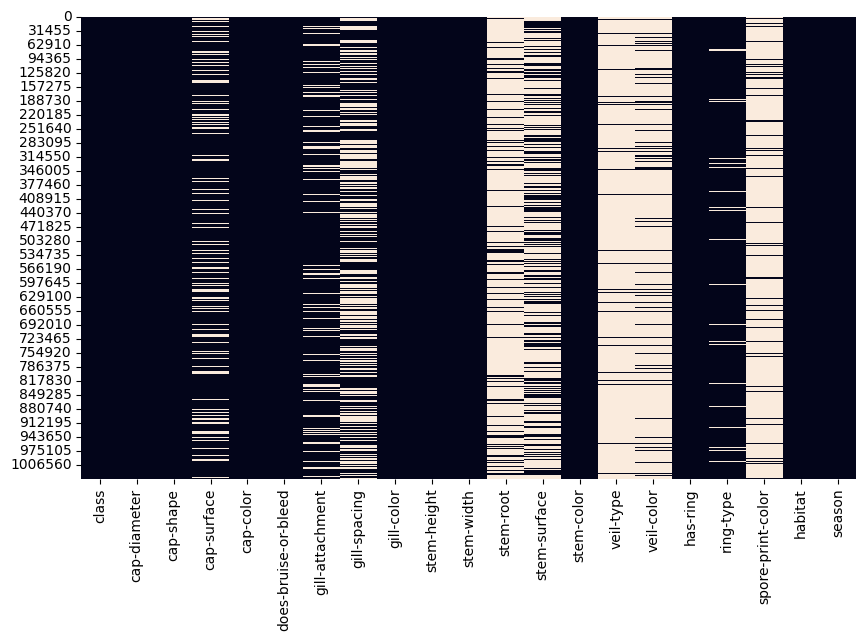

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)

                      Valores Faltantes  Porcentaje (%)
veil-type                        984000       94.797688
spore-print-color                930000       89.595376
veil-color                       912000       87.861272
stem-root                        876000       84.393064
stem-surface                     648000       62.427746
gill-spacing                     426000       41.040462
cap-surface                      240000       23.121387
gill-attachment                  168000       16.184971
ring-type                         42000        4.046243
class                                 0        0.000000
stem-color                            0        0.000000
habitat                               0        0.000000
has-ring                              0        0.000000
stem-width                            0        0.000000
cap-diameter                          0        0.000000
stem-height                           0        0.000000
gill-color                            0        0

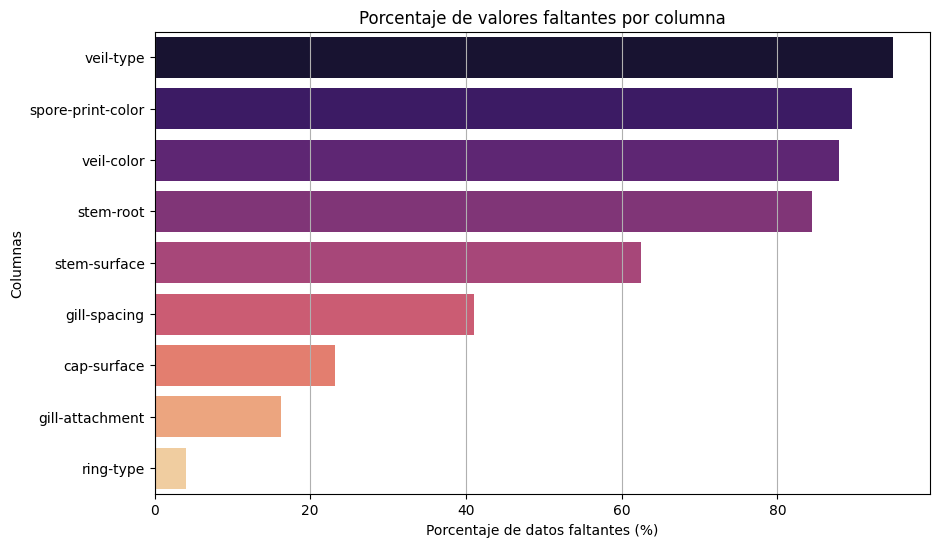

In [100]:
# Faltantes
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Valores Faltantes': missing, 'Porcentaje (%)': missing_percent})

print(missing_df)

# Duplicados
duplicates = df.duplicated().sum()
print("--------------------------------------------------------")
print(f"Número de filas duplicadas: {duplicates:,}")
print(f"Porcentaje de duplicados: {(duplicates / len(df)) * 100:.2f}%")

plt.figure(figsize=(10,6))
sns.barplot(x=missing_percent[missing_percent > 0], 
            y=missing_percent[missing_percent > 0].index, 
            palette='magma')
plt.title('Porcentaje de valores faltantes por columna')
plt.xlabel('Porcentaje de datos faltantes (%)')
plt.ylabel('Columnas')
plt.grid(axis='x')
plt.show()

Al examinar la cantidad y el porcentaje de valores faltantes por columna, se observó que el dataset presenta niveles significativos de ausencia de datos en varias variables. En particular:

- `veil_type` tiene un 94.8% de valores faltantes.

- `spore_print_color`, `veil_color` y `stem_root` también presentan más del 80% de datos ausentes.

- Otras variables como `stem_surface` (62.4%), `gill_spacing` (41%) y `cap_surface` (23%) muestran una cantidad intermedia de faltantes, mientras que el resto posee datos completos.

Estas proporciones indican que ciertas columnas aportan muy poca información útil o su imputación podría introducir un sesgo considerable. En particular, *veil_type*, con casi todos los valores nulos, probablemente deba ser eliminada del conjunto de datos, ya que no ofrece variabilidad ni información relevante. Para los casos intermedios, como cap-surface o gill-spacing, podríamos evaluar la imputación mediante otro parámetro como la moda o la media.
Por lo expresado anteriormente, concluímos que el dataset requiere un proceso de limpieza, priorizando la eliminación o imputación de variables con altos porcentajes de faltantes antes de continuar con la etapa de preprocesamiento. 

### 1.5. Identificación de outliers y posibles inconsistencias
Para este análisis se utilizó el método del rango intercuartílico (IQR). La elección de este método la justificamos en lo siguiente:
- No depende de la distribución (no asume normalidad). Esto es importante ya que, como se puede observar en los gráficos de *2. Distribución de variables numéricas*, dichas variables justamente no siguen una distribución normal.
- Es robusto frente a valores extremos. Los cuartiles no se ven afectados significativamente por pocos valores atípicos.

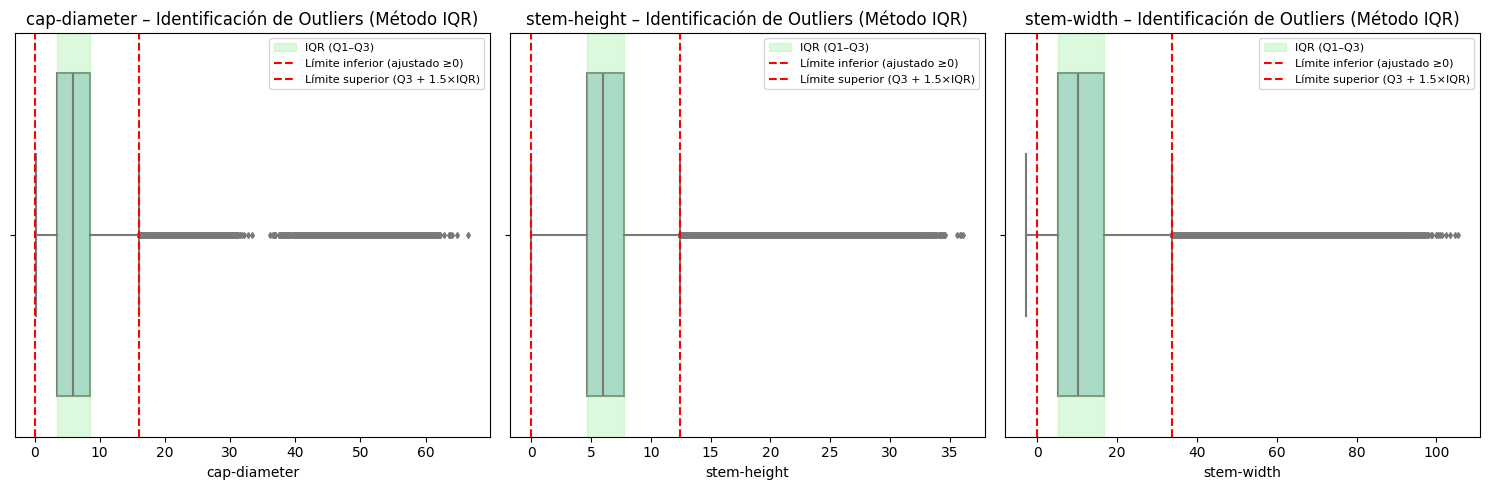

In [101]:
variables = ['cap-diameter', 'stem-height', 'stem-width']

plt.figure(figsize=(15, 5))

for i, var in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = max(Q1 - 1.5 * IQR, 0)  # el límite inferior lo recortamos en 0 para evidenciar valores atípicos
    upper_limit = Q3 + 1.5 * IQR

    sns.boxplot(x=df[var], color="lightblue", fliersize=3)
    
    plt.axvspan(Q1, Q3, color="lightgreen", alpha=0.3, label="IQR (Q1–Q3)")
    
    plt.axvline(lower_limit, color="red", linestyle="--", label="Límite inferior (ajustado ≥0)")
    plt.axvline(upper_limit, color="red", linestyle="--", label="Límite superior (Q3 + 1.5×IQR)")

    plt.title(f"{var} – Identificación de Outliers (Método IQR)")
    plt.xlabel(var)
    plt.legend(loc="upper right", fontsize=8)

plt.tight_layout()
plt.show()


**Los resultados indicaron que los outliers representan menos del 3% del total de observaciones, por lo que se consideró un nivel aceptable para continuar con el análisis sin comprometer la representatividad de los datos.**

### 1.6. Análisis de correlaciones entre variables

Para este análisis exploratorio, se buscó evaluar la fuerza de relación entre cada variable del dataset y la variable objetivo `class`, la cual indica si el hongo es o no comestible.
Dado que el dataset contiene tanto variables numéricas como categóricas, no pudimos usar un único método de correlación para todo el conjunto (cada tipo de variable requiere un tratamiento distinto). Por esta razon decidimos utilizar:
- **Cramér's V**: basada en el estadístico Chi-cuadrado, útil para estimar la asociación *entre variables categóricas*. En este caso, se usó para ver qué variables categóricas están más relacionadas con la clase objetivo ('class').

- **η — Correlation Ratio**: La correlación η (eta) mide la asociación *entre una variable numérica y una variable categórica* y permite capturar relaciones no lineales. La usamos para medir cómo se relacionan las variables numéricas con la clase objetivo.

c:\Users\ariel\AppData\Local\pypoetry\Cache\virtualenvs\ceia-ml-mushroom-classification-RFpc2XvD-py3.12\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


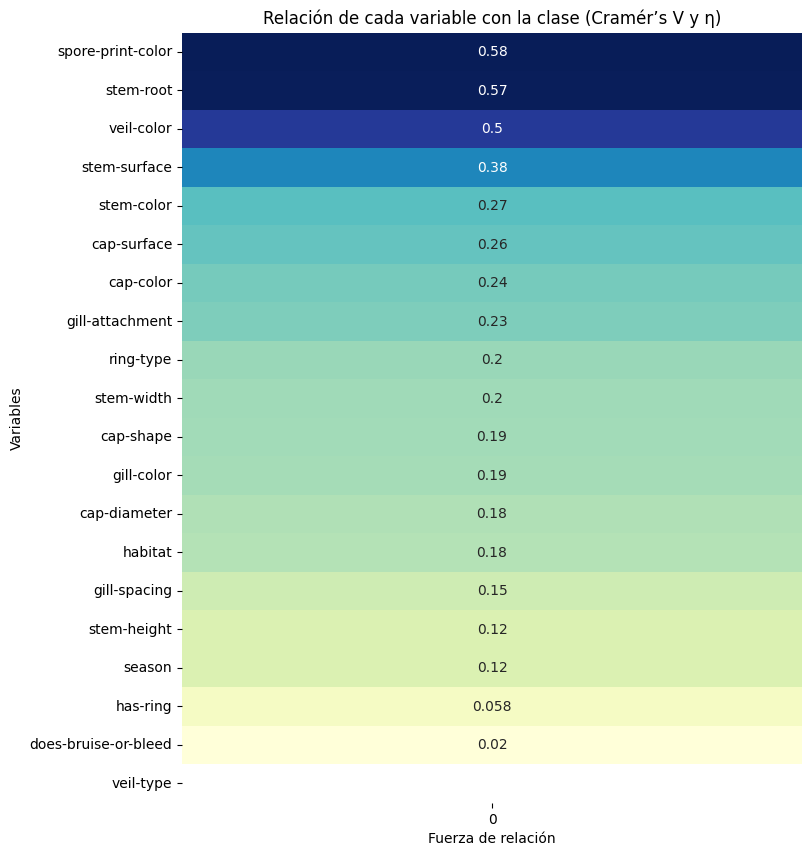

In [102]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    denom = min((kcorr - 1), (rcorr - 1))
    if denom <= 0:
        return np.nan
    return np.sqrt(phi2corr / denom)

def correlation_ratio(categories, values):
    categories = pd.Categorical(categories)
    cat_means = values.groupby(categories, observed=False).mean()
    n = values.groupby(categories, observed=False).count()
    overall_mean = values.mean()
    numerator = np.sum(n * (cat_means - overall_mean)**2)
    denominator = np.sum((values - overall_mean)**2)
    return np.sqrt(numerator / denominator) if denominator != 0 else 0

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns.drop('class')

# Correlaciones categóricas con class (Cramér’s V)
cramers_results = {}
for col in cat_cols:
    confusion_mat = pd.crosstab(df[col], df['class'])
    cramers_results[col] = cramers_v(confusion_mat)
cramers_series = pd.Series(cramers_results, name='CramersV')

# Correlación numérica con class (η)
eta_results = {}
for col in num_cols:
    eta_results[col] = correlation_ratio(df['class'], df[col])
eta_series = pd.Series(eta_results, name='Eta')

correlations_target = pd.concat([cramers_series, eta_series]).sort_values(ascending=False)
plt.figure(figsize=(8, 10))
sns.heatmap(correlations_target.to_frame(), annot=True, cmap="YlGnBu", cbar=False)
plt.title("Relación de cada variable con la clase (Cramér’s V y η)")
plt.ylabel("Variables")
plt.xlabel("Fuerza de relación")
plt.show()


Como se puede observar en gráfico precedente, las variables más influyentes para predecir la clase de hongo son principalmente morfológicas y de coloración: *spore-print-color, stem-root, veil-color y stem-surface* presentan las correlaciones más altas. Otras como *stem-color, cap-surface y gill-attachment* aportan información complementaria, mientras que variables como *has-ring y does-bruise-or-bleed* muestran escasa relevancia. Estos resultados fueron tenidos en cuenta para la selección de variables para el modelado, priorizando las más relevantes para optimizar la eficiencia del modelo.

### Resumen EDA

- Registros y columnas: 1.038.000 filas y 21 columnas (18 categóricas, 3 numéricas).

- Variable objetivo: `class` (hongos comestibles o venenosos, clasificación binaria).

- Variables numéricas: Distribuciones sesgadas con cola a la derecha; outliers <3%.

- Variables categóricas: Alta cardinalidad en varias columnas; `veil-type` poco informativa.

- Valores faltantes: Significativos en varias columnas. Requerirán limpieza o imputación.

- Correlación con la clase objetivo: Más relevantes: `spore-print-color`, `stem-root`, `veil-color`, `stem-surface`.

- Baja relevancia: `has-ring` y `does-bruise-or-bleed`.

___

# 2. Preprocesamiento y preparación de los datos

## 2.1. Definición de métricas y modelos a utilizar

Antes de entrenar los modelos, es fundamental definir las métricas que utilizaremos para evaluar su rendimiento. Dado que estamos trabajando con un problema de **clasificación binaria** (hongos comestibles vs venenosos), y considerando que el dataset presenta un leve desbalance de clases (57.6% venenosos vs 42.4% comestibles), evaluaremos los modelos utilizando múltiples métricas complementarias.

### 2.1.1. Métricas principales

Para este problema de clasificación, utilizaremos las siguientes métricas:

#### 1. Accuracy (Exactitud)
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Representa la proporción de predicciones correctas sobre el total. Es útil como métrica general, pero puede ser engañosa en datasets desbalanceados.

#### 2. Precision (Precisión)
$$\text{Precision} = \frac{TP}{TP + FP}$$

Mide qué proporción de los hongos clasificados como venenosos realmente lo son. **Alta precisión = pocos falsos positivos**.

#### 3. Recall (Sensibilidad o Tasa de Verdaderos Positivos)
$$\text{Recall} = \frac{TP}{TP + FN}$$

Mide qué proporción de hongos venenosos fueron correctamente identificados. **Alto recall = pocos falsos negativos**.

#### 4. F1-Score
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Media armónica entre precisión y recall. Equilibra ambas métricas y es especialmente útil en datasets desbalanceados.

#### 5. ROC-AUC (Area Under the ROC Curve)

Mide la capacidad del modelo para distinguir entre clases. Un AUC de 1.0 indica clasificación perfecta, mientras que 0.5 indica clasificación aleatoria.

#### 6. Matriz de Confusión

Visualización de TP, TN, FP y FN que permite analizar los tipos de errores cometidos por el modelo.

### 2.1.2. Contexto del problema y consecuencias de los errores

En el contexto de clasificación de hongos, los dos tipos de errores tienen implicaciones muy diferentes:

| Tipo de Error | Descripción | Consecuencia |
|--------------|-------------|--------------|
| **Falso Positivo (FP)** | Clasificar un hongo comestible como venenoso | Pérdida de alimento comestible (consecuencia menor) |
| **Falso Negativo (FN)** | Clasificar un hongo venenoso como comestible | **Riesgo de intoxicación o muerte (consecuencia crítica)** |

**Implicación importante**: Los **falsos negativos son mucho más graves** que los falsos positivos. Por lo tanto, priorizaremos modelos con **alto Recall** (baja tasa de falsos negativos) para asegurar que la mayoría de los hongos venenosos sean correctamente identificados, aunque esto pueda implicar clasificar algunos hongos comestibles como venenosos por precaución.

### 2.1.3. Función de evaluación unificada

Para facilitar la comparación entre modelos, crearemos una función que calcule todas las métricas de forma consistente y genere visualizaciones útiles.

In [178]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

def evaluate_model(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    """
    Evalua un modelo de clasificacion binaria con multiples metricas.
    
    Parameters:
    -----------
    y_true : array-like
        Valores verdaderos
    y_pred : array-like
        Predicciones del modelo (clases)
    y_pred_proba : array-like, optional
        Probabilidades predichas (para ROC-AUC)
    model_name : str
        Nombre del modelo para el reporte
        
    Returns:
    --------
    dict : Diccionario con todas las metricas
    """
    
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }
    
    # ROC-AUC si hay probabilidades disponibles
    if y_pred_proba is not None:
        metrics['ROC-AUC'] = roc_auc_score(y_true, y_pred_proba)
    
    # Imprimir reporte
    print(f"\n{'='*60}")
    print(f"EVALUACIÓN DEL MODELO: {model_name}")
    print(f"{'='*60}")
    for metric, value in metrics.items():
        if metric != 'Model':
            print(f"{metric:15s}: {value:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nMatriz de Confusión:")
    print(cm)
    
    # Reporte de clasificación
    print(f"\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred, target_names=['Comestible (0)', 'Venenoso (1)']))
    
    return metrics

def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    from sklearn.metrics import ConfusionMatrixDisplay
    
    cm = confusion_matrix(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=['Comestible (0)', 'Venenoso (1)']
    )
    
    disp.plot(cmap='Blues', ax=ax, colorbar=True, values_format='d')
    
    ax.set_title(f'Matriz de Confusión - {model_name}', fontsize=14, pad=15)
    ax.set_xlabel('Predicción', fontsize=12)
    ax.set_ylabel('Valor Real', fontsize=12)
    
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, model_name="Model"):
    """
    Visualiza la curva ROC
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

### 2.1.4. Selección de modelos y criterios de comparación

Para resolver el problema de clasificación binaria y seleccionar el modelo con mejor desempeño, se entrenarán y evaluarán los siguientes algoritmos:

- Logistic Regression

- Naive Bayes

- Decision Tree

- Random Forest

- Gradient Boosting

Todos los modelos seleccionados son algoritmos ampliamente conocidos en el ámbito del aprendizaje automático, con los cuales el grupo posee algo de experiencia práctica. Además, al aplicar transformaciones adecuadas, como codificación de variables categóricas y normalización de los datos, todos ellos pueden adaptarse sin inconvenientes al tipo de información presente en este problema. Por otra parte, al provenir de enfoques metodológicos distintos, su comparación permitirá evaluar con mayor profundidad la robustez y el rendimiento de cada uno frente al mismo conjunto de datos.

Para seleccionar el mejor modelo, consideraremos los siguientes criterios en orden de prioridad:

1. **Recall (Sensibilidad)** **[PRIORIDAD MÁXIMA]**
   - Debe ser **lo más alto posible** (idealmente >95%)
   - Minimiza el riesgo de falsos negativos (hongos venenosos clasificados como comestibles)

2. **F1-Score**
   - Equilibra Precision y Recall
   - Útil para comparar modelos con recall similar

3. **ROC-AUC**
   - Evalúa la capacidad general de discriminación del modelo

4. **Accuracy**
   - Métrica general de referencia, pero menos prioritaria dado el desbalance de clases

5. **Precision**
   - Importante pero secundaria al Recall en este contexto
   - Un modelo con alto Recall pero baja Precision es preferible a uno con alta Precision pero bajo Recall

**Nota**: En un escenario real de producción, sería aceptable tener algunos falsos positivos (rechazar hongos comestibles) si esto garantiza una detección cercana al 100% de los hongos venenosos.

## 2.2. Preprocesamiento de datos

El preprocesamiento es fundamental para garantizar que los datos estén en el formato adecuado para los diferentes modelos que vamos a entrenar. Basándonos en el análisis exploratorio, implementaremos las siguientes transformaciones:

1. **Eliminación de columnas poco informativas**: Columnas con >90% de valores faltantes o sin variabilidad
2. **Tratamiento de valores faltantes**: Imputación según el tipo de variable y porcentaje de faltantes
3. **Encoding de variables categóricas**: Transformación a formato numérico
4. **Estandarización de variables numéricas**: Normalización para modelos sensibles a la escala

**Importante**: Todas las transformaciones se ajustarán **solo con el conjunto de entrenamiento** para evitar data leakage.

### 2.2.1. Split inicial de datos

En esta etapa, dividimos el dataset en conjuntos de **entrenamiento (train)** y **prueba (test)** antes de realizar cualquier preprocesamiento. Esta división temprana es fundamental para evitar *data leakage* (filtración de información del conjunto de prueba hacia el entrenamiento).

Se utilizará una proporción de **80/20** (80% para entrenamiento y 20% para prueba), con `stratify=y` para mantener la proporción de clases balanceada en ambos conjuntos, dado que observamos un leve desbalance en la variable objetivo (57.6% venenosos vs 42.4% comestibles).

In [1]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 20

# Separamos features (X) y target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split inicial 80/20 con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=RANDOM_STATE, 
    stratify=y
)

print(f"Tamaño del conjunto original: {len(df):,} filas")
print(f"Tamaño del conjunto de entrenamiento: {len(X_train):,} filas ({len(X_train)/len(df)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {len(X_test):,} filas ({len(X_test)/len(df)*100:.1f}%)")
print(f"\nDistribución de clases en el conjunto original:")
print(y.value_counts(normalize=True))
print(f"\nDistribución de clases en entrenamiento:")
print(y_train.value_counts(normalize=True))
print(f"\nDistribución de clases en prueba:")
print(y_test.value_counts(normalize=True))

NameError: name 'df' is not defined

### 2.2.2. Análisis de valores faltantes en train y test

In [105]:
# Verificamos los valores faltantes en ambos conjuntos
print("=" * 60)
print("VALORES FALTANTES EN CONJUNTO DE ENTRENAMIENTO")
print("=" * 60)
missing_train = X_train.isnull().sum().sort_values(ascending=False)
missing_train_pct = (missing_train / len(X_train)) * 100
missing_train_df = pd.DataFrame({
    'Count': missing_train,
    'Percentage (%)': missing_train_pct
})
print(missing_train_df[missing_train_df['Count'] > 0])

print("\n" + "=" * 60)
print("VALORES FALTANTES EN CONJUNTO DE PRUEBA")
print("=" * 60)
missing_test = X_test.isnull().sum().sort_values(ascending=False)
missing_test_pct = (missing_test / len(X_test)) * 100
missing_test_df = pd.DataFrame({
    'Count': missing_test,
    'Percentage (%)': missing_test_pct
})
print(missing_test_df[missing_test_df['Count'] > 0])

VALORES FALTANTES EN CONJUNTO DE ENTRENAMIENTO
                    Count  Percentage (%)
veil-type          787249       94.803589
spore-print-color  744151       89.613560
veil-color         729677       87.870544
stem-root          700747       84.386681
stem-surface       518412       62.429191
gill-spacing       340785       41.038656
cap-surface        191889       23.108020
gill-attachment    134274       16.169798
ring-type           33641        4.051180

VALORES FALTANTES EN CONJUNTO DE PRUEBA
                    Count  Percentage (%)
veil-type          196751       94.774085
spore-print-color  185849       89.522640
veil-color         182323       87.824181
stem-root          175253       84.418593
stem-surface       129588       62.421965
gill-spacing        85215       41.047688
cap-surface         48111       23.174855
gill-attachment     33726       16.245665
ring-type            8359        4.026493


### 2.2.3. Estrategia de preprocesamiento
Durante el análisis exploratorio se detectó que algunas de las variables con mayor cantidad de valores faltantes, *como spore-print-color, stem-root y veil-color*, son justamente las que presentan mayor correlación con la variable objetivo. Probablemente se deba a que la correlación se calcula sobre los registros válidos, donde esas variables muestran una alta capacidad para distinguir entre clases. De todos modos, esta situación requiere un tratamiento particular, ya que una imputación inadecuada podría introducir sesgo en el modelo. Por tal motivo, se decidió eliminar la variable veil-type, que además de tener un 94,79 % de datos nulos posee una única categoría y no aporta información útil. En cambio, las demás variables con alto porcentaje de faltantes, pero con buena relación con la clase, se conservarán y serán tratadas con técnicas específicas para aprovechar su posible valor predictivo.
Segun lo explicado en el párrafo anterior, definimos la siguiente estrategia:

**1. Columnas a eliminar (>90% faltantes o sin variabilidad):**
- `veil-type`: 94.8% de valores faltantes y una sola categoría

**2. Imputación de valores faltantes:**
- **Variables categóricas**: Imputar con la moda (valor más frecuente) o crear categoría "missing"
- **Variables numéricas**: Imputar con la mediana (robusta ante outliers)

**3. Encoding de variables categóricas:**
- **One-Hot Encoding**: Para modelos que no manejan variables categóricas (Regresión Logística, Naive Bayes)
- **Label Encoding**: Alternativa para árboles (Decision Tree, Random Forest, Gradient Boosting pueden manejar ambos)

**4. Estandarización:**
- **StandardScaler**: Para Regresión Logística y Naive Bayes (sensibles a la escala)
- **Sin estandarizar**: Para modelos basados en árboles (no sensibles a la escala)

### 2.2.4. Implementación del pipeline de preprocesamiento

Utilizaremos `Pipeline` y `ColumnTransformer` de scikit-learn para crear pipelines reutilizables y evitar data leakage. Crearemos dos versiones:

1. **Pipeline con One-Hot Encoding**: Para Regresión Logística y Naive Bayes
2. **Pipeline con Label Encoding**: Para modelos basados en árboles

In [106]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

# Hacer copias de los conjuntos de datos
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# 1. Eliminar columnas con >90% de valores faltantes
columns_to_drop = ['veil-type']
X_train_clean = X_train_copy.drop(columns=columns_to_drop)
X_test_clean = X_test_copy.drop(columns=columns_to_drop)

# 2. Identificar columnas numéricas y categóricas
numeric_features = X_train_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train_clean.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas eliminadas: {columns_to_drop}")
print(f"\nColumnas numéricas ({len(numeric_features)}): {numeric_features}")
print(f"\nColumnas categóricas ({len(categorical_features)}): {categorical_features}")

Columnas eliminadas: ['veil-type']

Columnas numéricas (3): ['cap-diameter', 'stem-height', 'stem-width']

Columnas categóricas (16): ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


In [107]:
# Pipeline 1: Con One-Hot Encoding (para Regresión Logística y Naive Bayes)
# Este pipeline incluye estandarización

# Transformador para variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Transformador para variables categóricas
categorical_transformer_onehot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinar transformadores
preprocessor_onehot = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer_onehot, categorical_features)
    ])

print("Pipeline con One-Hot Encoding creado (para Regresión Logística y Naive Bayes)")
print("  - Variables numéricas: Imputación (mediana) + Estandarización")
print("  - Variables categóricas: Imputación (moda) + One-Hot Encoding")

Pipeline con One-Hot Encoding creado (para Regresión Logística y Naive Bayes)
  - Variables numéricas: Imputación (mediana) + Estandarización
  - Variables categóricas: Imputación (moda) + One-Hot Encoding


In [108]:
# Pipeline 2: Sin estandarización (para modelos basados en árboles)
# Los modelos de árboles no requieren estandarización y manejan bien variables categóricas codificadas

from sklearn.preprocessing import OrdinalEncoder

# Transformador para variables numéricas (solo imputación, sin escalado)
numeric_transformer_tree = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Transformador para variables categóricas (con Ordinal Encoding)
categorical_transformer_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combinar transformadores
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_tree, numeric_features),
        ('cat', categorical_transformer_ordinal, categorical_features)
    ])

print("Pipeline para modelos basados en árboles creado")
print("  - Variables numéricas: Imputación (mediana) sin estandarización")
print("  - Variables categóricas: Imputación (moda) + Ordinal Encoding")

Pipeline para modelos basados en árboles creado
  - Variables numéricas: Imputación (mediana) sin estandarización
  - Variables categóricas: Imputación (moda) + Ordinal Encoding


### 2.2.5. Aplicación de las transformaciones

Ahora aplicamos los pipelines a los conjuntos de entrenamiento y prueba. Es importante recordar que:
- **fit_transform()** en train: Aprende los parámetros (media, moda, categorías, etc.) y transforma
- **transform()** en test: Solo transforma usando los parámetros aprendidos del train

In [109]:
# Aplicar Pipeline 1 (One-Hot Encoding) - Para Regresión Logística y Naive Bayes
print("Aplicando transformaciones con One-Hot Encoding...")
X_train_onehot = preprocessor_onehot.fit_transform(X_train_clean)
X_test_onehot = preprocessor_onehot.transform(X_test_clean)

print(f"Datos transformados con One-Hot Encoding:")
print(f"  - X_train shape: {X_train_onehot.shape}")
print(f"  - X_test shape: {X_test_onehot.shape}")

# Aplicar Pipeline 2 (Ordinal Encoding) - Para modelos basados en árboles
print("\nAplicando transformaciones para modelos de árboles...")
X_train_tree = preprocessor_tree.fit_transform(X_train_clean)
X_test_tree = preprocessor_tree.transform(X_test_clean)

print(f"Datos transformados para modelos de árboles:")
print(f"  - X_train shape: {X_train_tree.shape}")
print(f"  - X_test shape: {X_test_tree.shape}")

print(f"\n{'='*60}")
print("RESUMEN DEL PREPROCESAMIENTO")
print(f"{'='*60}")
print(f"Dataset original: {X_train.shape[1]} columnas")
print(f"Después de eliminar columnas: {X_train_clean.shape[1]} columnas")
print(f"Después de One-hot encoding: {X_train_onehot.shape[1]} features")
print(f"Después de Ordinal encoding: {X_train_tree.shape[1]} features")

Aplicando transformaciones con One-Hot Encoding...
Datos transformados con One-Hot Encoding:
  - X_train shape: (830400, 118)
  - X_test shape: (207600, 118)

Aplicando transformaciones para modelos de árboles...
Datos transformados para modelos de árboles:
  - X_train shape: (830400, 19)
  - X_test shape: (207600, 19)

RESUMEN DEL PREPROCESAMIENTO
Dataset original: 20 columnas
Después de eliminar columnas: 19 columnas
Después de One-hot encoding: 118 features
Después de Ordinal encoding: 19 features


### 2.2.6. Preparación de la variable objetivo

Para algunos modelos (especialmente Naive Bayes y Regresión Logística en scikit-learn), es recomendable codificar la variable objetivo como valores numéricos.

In [110]:
# Codificar la variable objetivo
# e (edible/comestible) = 0
# p (poisonous/venenoso) = 1

label_encoder_y = LabelEncoder()
y_train_encoded = label_encoder_y.fit_transform(y_train)
y_test_encoded = label_encoder_y.transform(y_test)

print("Codificación de la variable objetivo:")
print(f"  - Clases originales: {label_encoder_y.classes_}")
print(f"  - Mapeo: {dict(zip(label_encoder_y.classes_, label_encoder_y.transform(label_encoder_y.classes_)))}")
print(f"\nDistribución en train (codificado):")
print(pd.Series(y_train_encoded).value_counts().sort_index())
print(f"\nDistribución en test (codificado):")
print(pd.Series(y_test_encoded).value_counts().sort_index())

Codificación de la variable objetivo:
  - Clases originales: ['e' 'p']
  - Mapeo: {'e': 0, 'p': 1}

Distribución en train (codificado):
0    369600
1    460800
Name: count, dtype: int64

Distribución en test (codificado):
0     92400
1    115200
Name: count, dtype: int64


### 2.2.7. Mapeo de datasets preprocesados por modelo

Para claridad, a continuación se especifica qué dataset preprocesado debe usar cada uno de los 5 modelos:

In [111]:
# Diccionario de configuración: mapeo de cada modelo a su dataset correspondiente
model_config = {
    'Logistic Regression': {
        'X_train': X_train_onehot,
        'X_test': X_test_onehot,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'One-hot encoding + StandardScaler',
        'reason': 'Regresión Logística es sensible a la escala y requiere variables numéricas'
    },
    'Naive Bayes': {
        'X_train': X_train_onehot,
        'X_test': X_test_onehot,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'One-hot encoding + StandardScaler',
        'reason': 'Naive Bayes funciona mejor con variables estandarizadas y encoding numérico'
    },
    'Decision Tree': {
        'X_train': X_train_tree,
        'X_test': X_test_tree,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'Ordinal encoding (sin escalar)',
        'reason': 'Los árboles de decisión no requieren estandarización y manejan bien Ordinal encoding'
    },
    'Random Forest': {
        'X_train': X_train_tree,
        'X_test': X_test_tree,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'Ordinal encoding (sin escalar)',
        'reason': 'Random Forest (conjunto de árboles) no requiere estandarización'
    },
    'Gradient Boosting': {
        'X_train': X_train_tree,
        'X_test': X_test_tree,
        'y_train': y_train_encoded,
        'y_test': y_test_encoded,
        'preprocessor': 'Ordinal encoding (sin escalar)',
        'reason': 'Gradient Boosting (conjunto de árboles) no requiere estandarización'
    }
}

# Mostrar configuración
print("="*80)
print("CONFIGURACIÓN DE PREPROCESAMIENTO POR MODELO")
print("="*80)
for model_name, config in model_config.items():
    print(f"\n- {model_name}")
    print(f"   Pipeline: {config['preprocessor']}")
    print(f"   Training shape: {config['X_train'].shape}")
    print(f"   Test shape: {config['X_test'].shape}")
    print(f"   Razón: {config['reason']}")

print("\n" + "="*80)
print("RESUMEN")
print("="*80)
print(f"Modelos con One-hot encoding + Estandarización: Logistic Regression, Naive Bayes")
print(f"Modelos con Ordinal encoding (sin escalar): Decision Tree, Random Forest, Gradient Boosting")
print(f"Todos los modelos usan y_train_encoded y y_test_encoded como variable objetivo")

CONFIGURACIÓN DE PREPROCESAMIENTO POR MODELO

- Logistic Regression
   Pipeline: One-hot encoding + StandardScaler
   Training shape: (830400, 118)
   Test shape: (207600, 118)
   Razón: Regresión Logística es sensible a la escala y requiere variables numéricas

- Naive Bayes
   Pipeline: One-hot encoding + StandardScaler
   Training shape: (830400, 118)
   Test shape: (207600, 118)
   Razón: Naive Bayes funciona mejor con variables estandarizadas y encoding numérico

- Decision Tree
   Pipeline: Ordinal encoding (sin escalar)
   Training shape: (830400, 19)
   Test shape: (207600, 19)
   Razón: Los árboles de decisión no requieren estandarización y manejan bien Ordinal encoding

- Random Forest
   Pipeline: Ordinal encoding (sin escalar)
   Training shape: (830400, 19)
   Test shape: (207600, 19)
   Razón: Random Forest (conjunto de árboles) no requiere estandarización

- Gradient Boosting
   Pipeline: Ordinal encoding (sin escalar)
   Training shape: (830400, 19)
   Test shape: (2076

### Resumen del preprocesamiento

**Datasets preparados:**

1. **Pipeline con One-hot encoding + Estandarización:**
   - Variables: `X_train_onehot`, `X_test_onehot`
   - Target: `y_train_encoded`, `y_test_encoded`
   - **Para:** Logistic Regression, Naive Bayes
   - **Razón:** Estos modelos son sensibles a la escala y requieren variables numéricas

2. **Pipeline con Ordinal encoding (sin estandarizar):**
   - Variables: `X_train_tree`, `X_test_tree`
   - Target: `y_train_encoded`, `y_test_encoded`
   - **Para:** Decision Tree, Random Forest, Gradient Boosting
   - **Razón:** Los modelos basados en árboles no requieren estandarización

**Transformaciones aplicadas:**
- Eliminación de `veil-type` (94.8% valores faltantes)
- Imputación de valores faltantes (mediana para numéricas, moda para categóricas)
- Encoding de variables categóricas (One-hot y Ordinal según el modelo)
- Estandarización de variables numéricas (solo para modelos que lo requieren)
- Sin data leakage: transformaciones ajustadas solo con datos de entrenamiento

**Variable objetivo:**
- `y_train_encoded`, `y_test_encoded`: Codificación numérica (0=comestible, 1=venenoso)

**Próximo paso:** Entrenar y comparar los 5 modelos propuestos usando el diccionario `model_config` que especifica qué dataset usar para cada modelo.

---

# 3. Modelización: Construcción, entrenamiento y evaluaciones parciales

En esta sección entrenaremos y evaluaremos los 5 modelos de clasificación seleccionados:

1. **Logistic Regression** (Regresión Logística)
2. **Naive Bayes** (Clasificador Bayesiano)
3. **Decision Tree** (Árbol de Decisión)
4. **Random Forest** (Bosque Aleatorio)
5. **Gradient Boosting** (Impulso de Gradiente)

Cada modelo será entrenado con su dataset preprocesado correspondiente (según lo definido en `model_config`) y evaluado utilizando las métricas establecidas en la sección 2.2.

### 3.1. Importación de modelos y configuración inicial

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import time


results = []

### 3.2. Modelo 1: Logistic Regression (Regresión Logística)

La regresión logística es un modelo lineal que utiliza la función sigmoide para predecir probabilidades de pertenencia a una clase. Es interpretable y eficiente, aunque asume relaciones lineales entre las características y el log-odds de la variable objetivo.

In [113]:
RANDOM_STATE = 20

# Obtener los datos preprocesados para Logistic Regression
config_lr = model_config['Logistic Regression']
X_train_lr = config_lr['X_train']
X_test_lr = config_lr['X_test']
y_train_lr = config_lr['y_train']
y_test_lr = config_lr['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_lr, y_train_lr)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_lr = lr_model.predict(X_test_lr)
y_pred_proba_lr = lr_model.predict_proba(X_test_lr)[:, 1]  # Probabilidades para clase positiva (venenoso)

# Evaluar el modelo
metrics_lr = evaluate_model(y_test_lr, y_pred_lr, y_pred_proba_lr, "Logistic Regression")
metrics_lr['Training Time (s)'] = training_time
results.append(metrics_lr)

Entrenando Logistic Regression...
Modelo entrenado en 14.40 segundos

EVALUACIÓN DEL MODELO: Logistic Regression
Accuracy       : 0.8433
Precision      : 0.8717
Recall         : 0.8413
F1-Score       : 0.8563
ROC-AUC        : 0.9145

Matriz de Confusión:
[[78139 14261]
 [18278 96922]]

Reporte de Clasificación:
                precision    recall  f1-score   support

Comestible (0)       0.81      0.85      0.83     92400
  Venenoso (1)       0.87      0.84      0.86    115200

      accuracy                           0.84    207600
     macro avg       0.84      0.84      0.84    207600
  weighted avg       0.84      0.84      0.84    207600



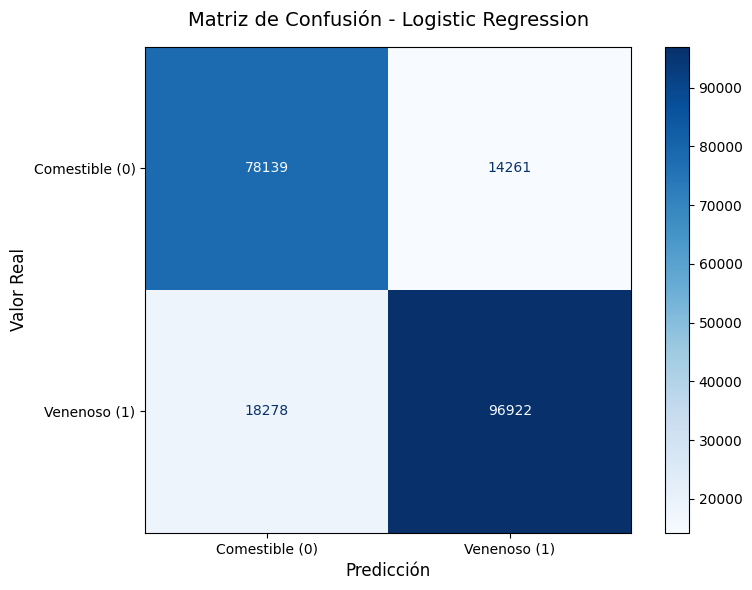

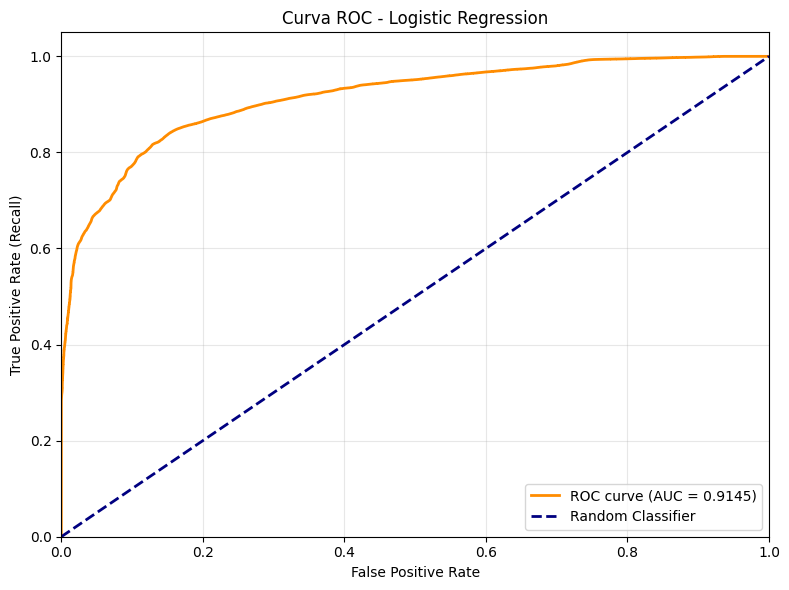

In [179]:
# Visualizaciones para Logistic Regression
plot_confusion_matrix(y_test_lr, y_pred_lr, "Logistic Regression")
plot_roc_curve(y_test_lr, y_pred_proba_lr, "Logistic Regression")

### 3.3. Modelo 2: Naive Bayes (Clasificador Bayesiano)

Naive Bayes es un clasificador probabilístico basado en el teorema de Bayes con la suposición de independencia condicional entre las características. Es rápido, eficiente y funciona bien con conjuntos de datos grandes.

In [115]:
# Obtener los datos preprocesados para Naive Bayes
config_nb = model_config['Naive Bayes']
X_train_nb = config_nb['X_train']
X_test_nb = config_nb['X_test']
y_train_nb = config_nb['y_train']
y_test_nb = config_nb['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Naive Bayes (GaussianNB)...")
start_time = time.time()

nb_model = GaussianNB()
nb_model.fit(X_train_nb, y_train_nb)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_nb = nb_model.predict(X_test_nb)
y_pred_proba_nb = nb_model.predict_proba(X_test_nb)[:, 1]

# Evaluar el modelo
metrics_nb = evaluate_model(y_test_nb, y_pred_nb, y_pred_proba_nb, "Naive Bayes")
metrics_nb['Training Time (s)'] = training_time
results.append(metrics_nb)

Entrenando Naive Bayes (GaussianNB)...
Modelo entrenado en 1.08 segundos

EVALUACIÓN DEL MODELO: Naive Bayes
Accuracy       : 0.6089
Precision      : 0.9841
Recall         : 0.3001
F1-Score       : 0.4599
ROC-AUC        : 0.8344

Matriz de Confusión:
[[91843   557]
 [80634 34566]]

Reporte de Clasificación:
                precision    recall  f1-score   support

Comestible (0)       0.53      0.99      0.69     92400
  Venenoso (1)       0.98      0.30      0.46    115200

      accuracy                           0.61    207600
     macro avg       0.76      0.65      0.58    207600
  weighted avg       0.78      0.61      0.56    207600



In [135]:
# Visualizaciones para Naive Bayes
plot_confusion_matrix(y_test_nb, y_pred_nb, "Naive Bayes")
plot_roc_curve(y_test_nb, y_pred_proba_nb, "Naive Bayes")

array([[91843,   557],
       [80634, 34566]], dtype=int64)

### 3.4. Modelo 3: Decision Tree

Los árboles de decisión son modelos no paramétricos que aprenden reglas de decisión simples a partir de las características de los datos. Son altamente interpretables pero propensos al sobreajuste sin regularización adecuada.

In [117]:
RANDOM_STATE = 20

# Obtener los datos preprocesados para Decision Tree
config_dt = model_config['Decision Tree']
X_train_dt = config_dt['X_train']
X_test_dt = config_dt['X_test']
y_train_dt = config_dt['y_train']
y_test_dt = config_dt['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Decision Tree...")
start_time = time.time()

dt_model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=20, min_samples_split=10)
dt_model.fit(X_train_dt, y_train_dt)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_dt = dt_model.predict(X_test_dt)
y_pred_proba_dt = dt_model.predict_proba(X_test_dt)[:, 1]

# Evaluar el modelo
metrics_dt = evaluate_model(y_test_dt, y_pred_dt, y_pred_proba_dt, "Decision Tree")
metrics_dt['Training Time (s)'] = training_time
results.append(metrics_dt)

Entrenando Decision Tree...
Modelo entrenado en 6.08 segundos

EVALUACIÓN DEL MODELO: Decision Tree
Accuracy       : 0.9993
Precision      : 0.9998
Recall         : 0.9990
F1-Score       : 0.9994
ROC-AUC        : 0.9998

Matriz de Confusión:
[[ 92374     26]
 [   113 115087]]

Reporte de Clasificación:
                precision    recall  f1-score   support

Comestible (0)       1.00      1.00      1.00     92400
  Venenoso (1)       1.00      1.00      1.00    115200

      accuracy                           1.00    207600
     macro avg       1.00      1.00      1.00    207600
  weighted avg       1.00      1.00      1.00    207600



In [148]:
# Visualizaciones para Decision Tree
plot_confusion_matrix(y_test_dt, y_pred_dt, "Decision Tree")
plot_roc_curve(y_test_dt, y_pred_proba_dt, "Decision Tree")

array([[ 92374,     26],
       [   113, 115087]], dtype=int64)

### 3.5. Modelo 4: Random Forest

Random Forest es un método de ensamble que construye múltiples árboles de decisión y combina sus predicciones mediante votación. Reduce el sobreajuste y generalmente ofrece mejor rendimiento que un árbol individual.

In [119]:
RANDOM_STATE = 20

# Obtener los datos preprocesados para Random Forest
config_rf = model_config['Random Forest']
X_train_rf = config_rf['X_train']
X_test_rf = config_rf['X_test']
y_train_rf = config_rf['y_train']
y_test_rf = config_rf['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=RANDOM_STATE, 
    max_depth=20, 
    min_samples_split=10,
    n_jobs=-1  # Usar todos los cores disponibles
)
rf_model.fit(X_train_rf, y_train_rf)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test_rf)
y_pred_proba_rf = rf_model.predict_proba(X_test_rf)[:, 1]

# Evaluar el modelo
metrics_rf = evaluate_model(y_test_rf, y_pred_rf, y_pred_proba_rf, "Random Forest")
metrics_rf['Training Time (s)'] = training_time
results.append(metrics_rf)

Entrenando Random Forest...
Modelo entrenado en 22.50 segundos

EVALUACIÓN DEL MODELO: Random Forest
Accuracy       : 1.0000
Precision      : 1.0000
Recall         : 1.0000
F1-Score       : 1.0000
ROC-AUC        : 1.0000

Matriz de Confusión:
[[ 92400      0]
 [     4 115196]]

Reporte de Clasificación:
                precision    recall  f1-score   support

Comestible (0)       1.00      1.00      1.00     92400
  Venenoso (1)       1.00      1.00      1.00    115200

      accuracy                           1.00    207600
     macro avg       1.00      1.00      1.00    207600
  weighted avg       1.00      1.00      1.00    207600



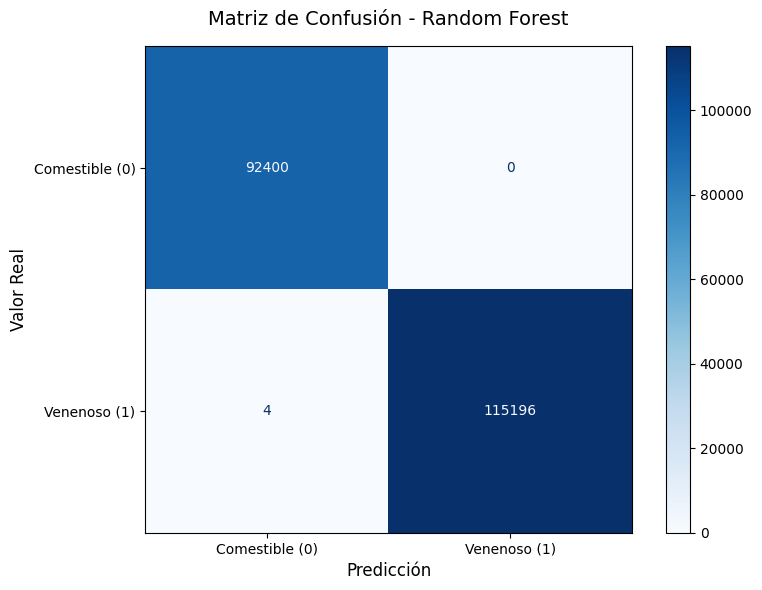

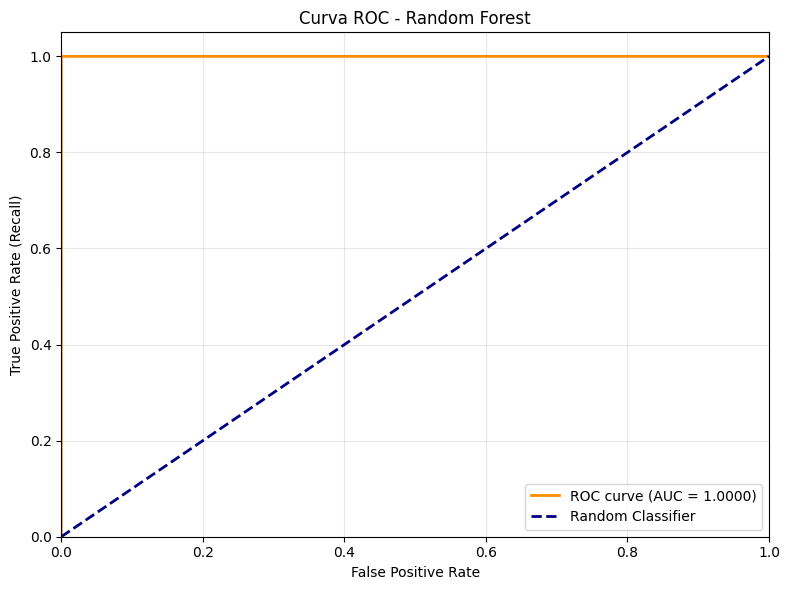

In [180]:
# Visualizaciones para Random Forest
plot_confusion_matrix(y_test_rf, y_pred_rf, "Random Forest")
plot_roc_curve(y_test_rf, y_pred_proba_rf, "Random Forest")

### 3.6. Modelo 5: Gradient Boosting

Gradient Boosting es un método de ensamble que construye árboles de decisión de forma secuencial, donde cada árbol nuevo intenta corregir los errores de los anteriores. Suele ofrecer el mejor rendimiento predictivo, aunque requiere más tiempo de entrenamiento.

In [121]:
RANDOM_STATE = 20

# Obtener los datos preprocesados para Gradient Boosting
config_gb = model_config['Gradient Boosting']
X_train_gb = config_gb['X_train']
X_test_gb = config_gb['X_test']
y_train_gb = config_gb['y_train']
y_test_gb = config_gb['y_test']

# Inicializar y entrenar el modelo
print("Entrenando Gradient Boosting...")
start_time = time.time()

gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    random_state=RANDOM_STATE, 
    max_depth=5,
    learning_rate=0.1,
    min_samples_split=10
)
gb_model.fit(X_train_gb, y_train_gb)

training_time = time.time() - start_time
print(f"Modelo entrenado en {training_time:.2f} segundos")

# Realizar predicciones
y_pred_gb = gb_model.predict(X_test_gb)
y_pred_proba_gb = gb_model.predict_proba(X_test_gb)[:, 1]

# Evaluar el modelo
metrics_gb = evaluate_model(y_test_gb, y_pred_gb, y_pred_proba_gb, "Gradient Boosting")
metrics_gb['Training Time (s)'] = training_time
results.append(metrics_gb)

Entrenando Gradient Boosting...
Modelo entrenado en 241.01 segundos

EVALUACIÓN DEL MODELO: Gradient Boosting
Accuracy       : 0.9926
Precision      : 0.9969
Recall         : 0.9897
F1-Score       : 0.9933
ROC-AUC        : 0.9998

Matriz de Confusión:
[[ 92044    356]
 [  1185 114015]]

Reporte de Clasificación:
                precision    recall  f1-score   support

Comestible (0)       0.99      1.00      0.99     92400
  Venenoso (1)       1.00      0.99      0.99    115200

      accuracy                           0.99    207600
     macro avg       0.99      0.99      0.99    207600
  weighted avg       0.99      0.99      0.99    207600



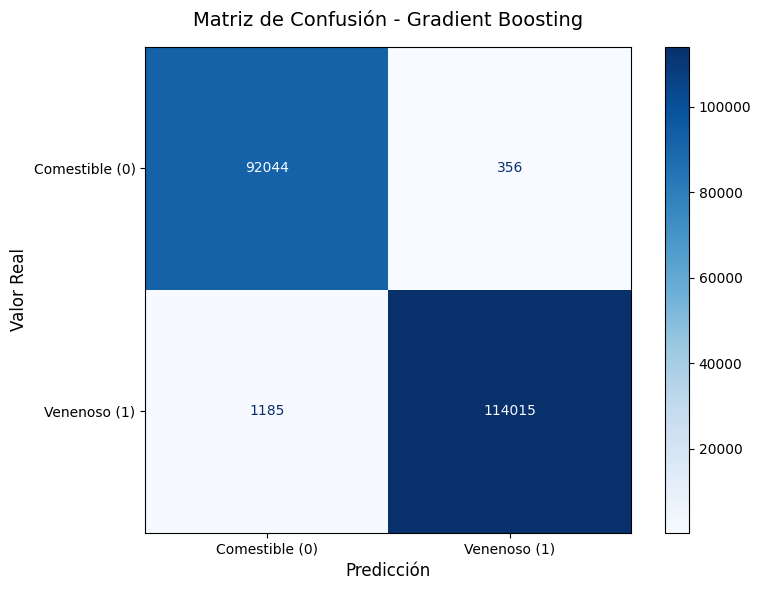

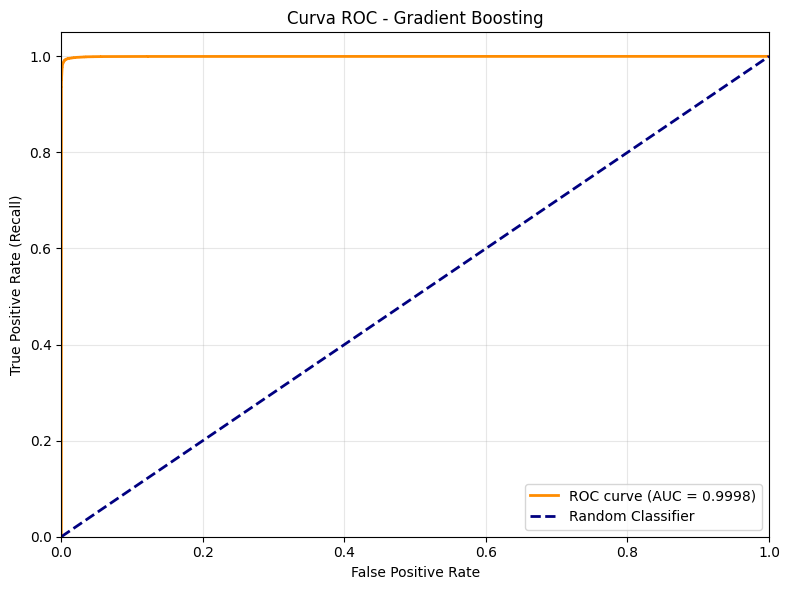

In [181]:
# Visualizaciones para Gradient Boosting
plot_confusion_matrix(y_test_gb, y_pred_gb, "Gradient Boosting")
plot_roc_curve(y_test_gb, y_pred_proba_gb, "Gradient Boosting")

---

## 4. Evaluación de Resultados

### 4.1. Comparación de los modelos utilizados
Ahora que hemos entrenado y evaluado los 5 modelos, vamos a comparar sus resultados de forma visual y tabular para identificar el modelo con mejor desempeño.

In [123]:
# Crear DataFrame con todos los resultados
results_df = pd.DataFrame(results)

# Ordenar por Recall (nuestra métrica prioritaria) de mayor a menor
results_df_sorted = results_df.sort_values('Recall', ascending=False)

print("="*80)
print("TABLA COMPARATIVA DE TODOS LOS MODELOS")
print("="*80)
print(results_df_sorted.to_string(index=False))

print("\n" + "="*80)
print("RANKING POR RECALL (Metrica prioritaria)")
print("="*80)
for idx, row in results_df_sorted.iterrows():
    print(f"{idx+1}. {row['Model']:20s} - Recall: {row['Recall']:.4f}")

TABLA COMPARATIVA DE TODOS LOS MODELOS
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  Training Time (s)
      Random Forest  0.999981   1.000000 0.999965  0.999983 1.000000          22.495316
      Decision Tree  0.999330   0.999774 0.999019  0.999396 0.999820           6.081780
  Gradient Boosting  0.992577   0.996887 0.989714  0.993287 0.999765         241.012510
Logistic Regression  0.843261   0.871734 0.841337  0.856266 0.914468          14.400373
        Naive Bayes  0.608907   0.984141 0.300052  0.459890 0.834429           1.082790

RANKING POR RECALL (Metrica prioritaria)
4. Random Forest        - Recall: 1.0000
3. Decision Tree        - Recall: 0.9990
5. Gradient Boosting    - Recall: 0.9897
1. Logistic Regression  - Recall: 0.8413
2. Naive Bayes          - Recall: 0.3001


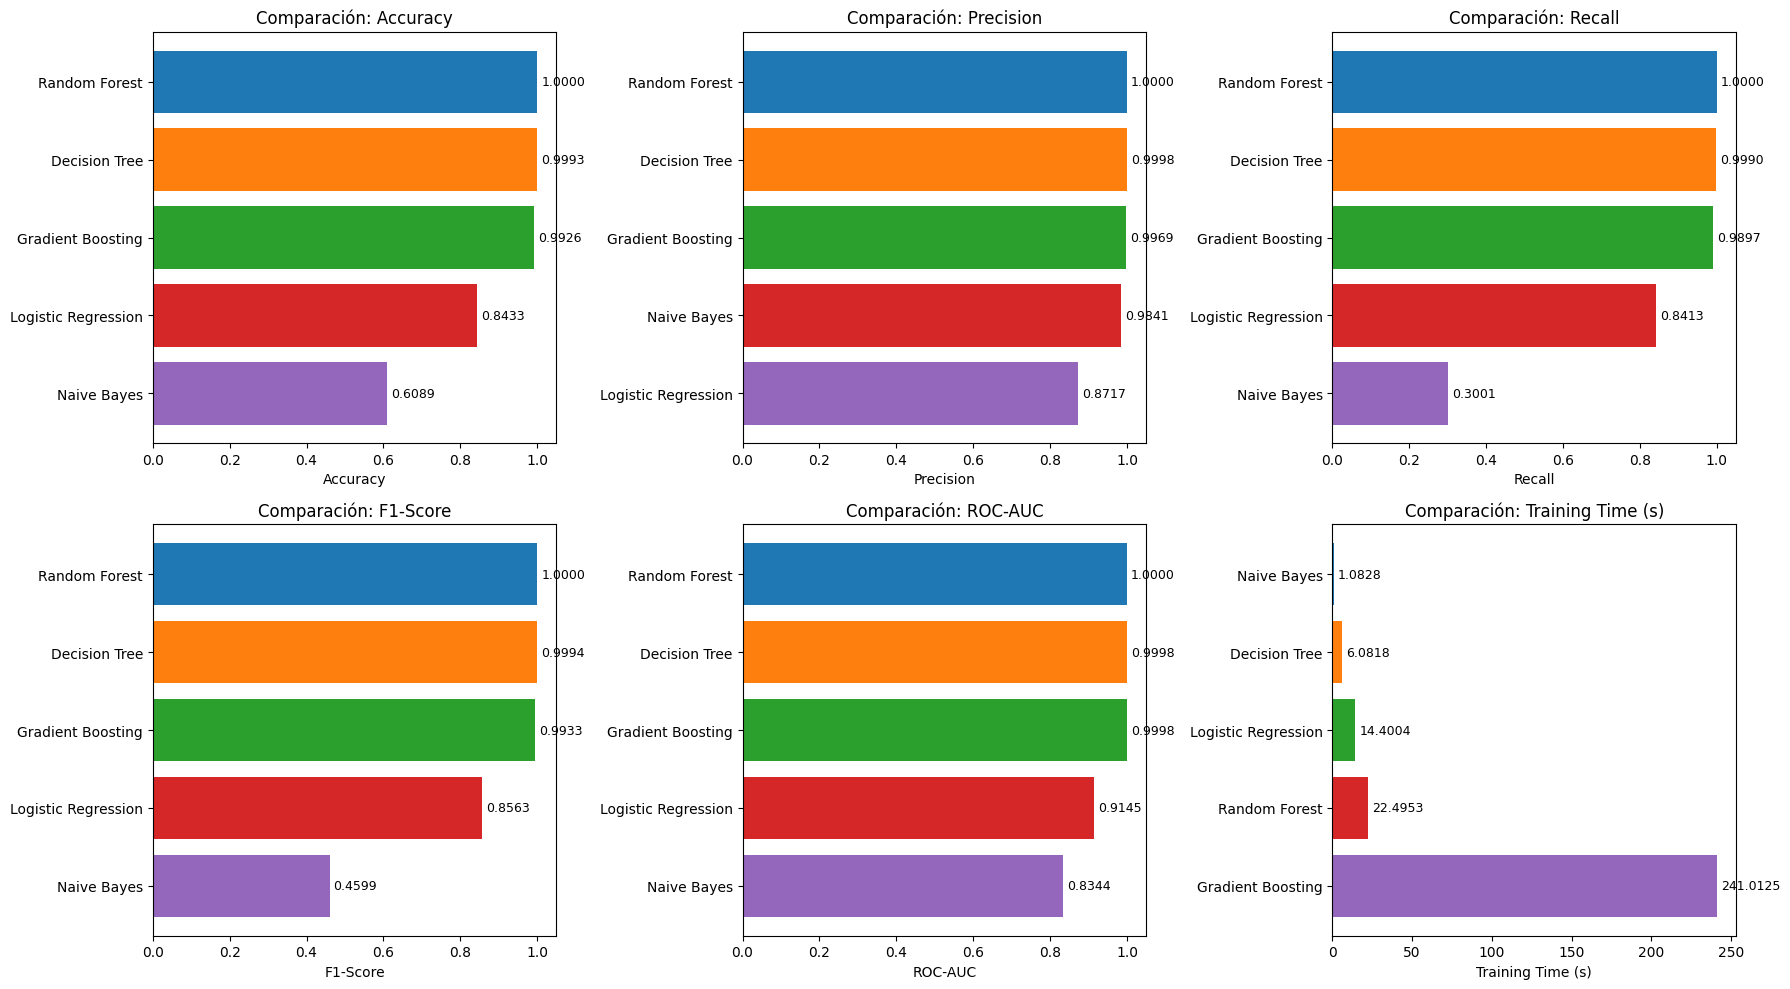

In [124]:
# Visualización comparativa de métricas
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Training Time (s)']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]
    
    data = results_df.sort_values(metric, ascending=False if metric != 'Training Time (s)' else True)
    
    bars = ax.barh(data['Model'], data[metric], color=colors)
    ax.set_xlabel(metric)
    ax.set_title(f'Comparación: {metric}')
    ax.invert_yaxis()
    
    # Añadir valores en las barras
    for i, (bar, value) in enumerate(zip(bars, data[metric])):
        width = bar.get_width()
        label_x_pos = width + (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{value:.4f}',
                va='center', fontsize=9)

plt.tight_layout()
plt.show()

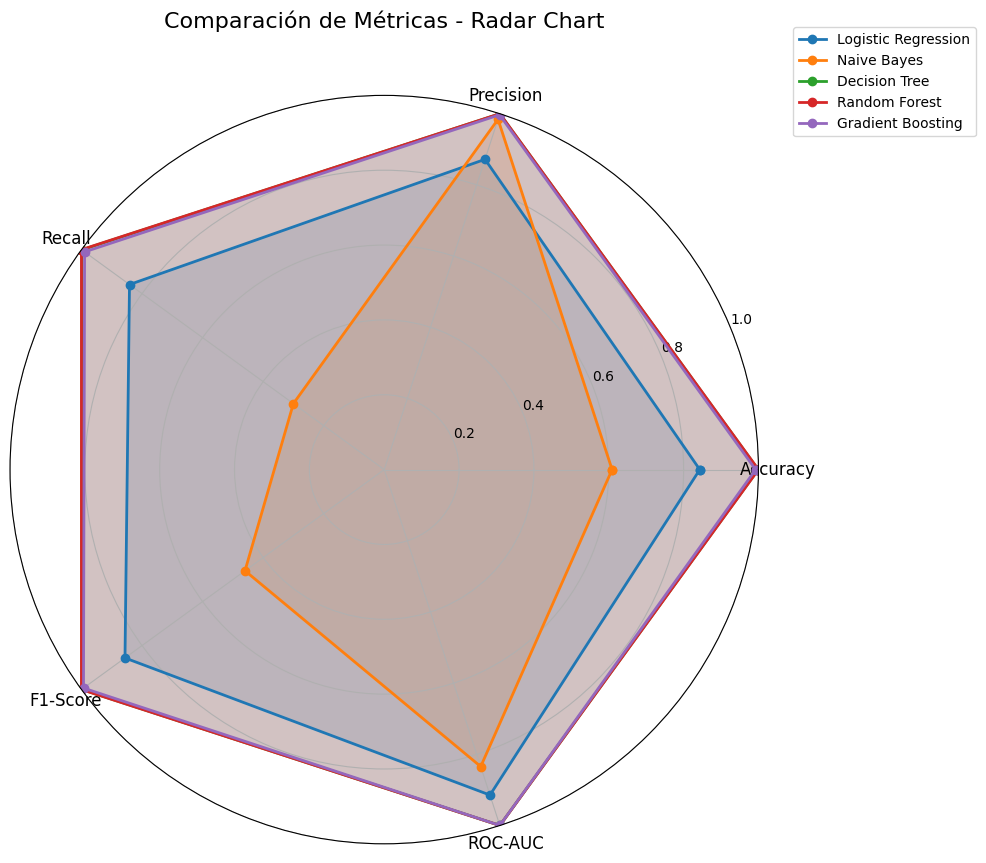

In [125]:
# Comparación visual con radar chart
import numpy as np

# Preparar datos para el radar chart (normalizados)
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Ángulos para cada métrica
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

# Plotear cada modelo
for idx, row in results_df.iterrows():
    values = [row[cat] for cat in categories]
    values += values[:1]  # Cerrar el círculo
    
    ax.plot(angles, values, 'o-', linewidth=2, label=row['Model'])
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12)
ax.set_ylim(0, 1)
ax.set_title('Comparación de Métricas - Radar Chart', size=16, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

## 4.2. Selección del modelo más acorde

Basándonos en los criterios establecidos en la sección 2.2.4, donde priorizamos **Recall** como métrica principal (para minimizar falsos negativos y evitar clasificar hongos venenosos como comestibles), procedemos a seleccionar el mejor modelo.

In [126]:
# Identificar el mejor modelo según Recall
best_model_idx = results_df['Recall'].idxmax()
best_model = results_df.loc[best_model_idx]

print("="*80)
print("MEJOR MODELO SEGÚN LOS CRITERIOS ESTABLECIDOS")
print("="*80)
print(f"\n>> Modelo seleccionado: {best_model['Model']}")
print(f"\nMétricas del mejor modelo:")
print(f"   - Accuracy:      {best_model['Accuracy']:.4f}")
print(f"   - Precision:     {best_model['Precision']:.4f}")
print(f"   - Recall:        {best_model['Recall']:.4f} < (Métrica prioritaria)")
print(f"   - F1-Score:      {best_model['F1-Score']:.4f}")
print(f"   - ROC-AUC:       {best_model['ROC-AUC']:.4f}")
print(f"   - Training Time: {best_model['Training Time (s)']:.2f} segundos")

print(f"\nJustificación:")
print(f"   El modelo {best_model['Model']} fue seleccionado por presentar el mayor Recall")
print(f"   ({best_model['Recall']:.4f}), lo que minimiza el riesgo crítico de clasificar hongos")
print(f"   venenosos como comestibles (falsos negativos).")

# Comparar con otros modelos
print(f"\nComparación con otros modelos:")
for idx, row in results_df.iterrows():
    if idx != best_model_idx:
        recall_diff = (best_model['Recall'] - row['Recall']) * 100
        print(f"   - {row['Model']:20s}: Recall = {row['Recall']:.4f} (diferencia: {recall_diff:+.2f}%)")

MEJOR MODELO SEGÚN LOS CRITERIOS ESTABLECIDOS

>> Modelo seleccionado: Random Forest

Métricas del mejor modelo:
   - Accuracy:      1.0000
   - Precision:     1.0000
   - Recall:        1.0000 < (Métrica prioritaria)
   - F1-Score:      1.0000
   - ROC-AUC:       1.0000
   - Training Time: 22.50 segundos

Justificación:
   El modelo Random Forest fue seleccionado por presentar el mayor Recall
   (1.0000), lo que minimiza el riesgo crítico de clasificar hongos
   venenosos como comestibles (falsos negativos).

Comparación con otros modelos:
   - Logistic Regression : Recall = 0.8413 (diferencia: +15.86%)
   - Naive Bayes         : Recall = 0.3001 (diferencia: +69.99%)
   - Decision Tree       : Recall = 0.9990 (diferencia: +0.09%)
   - Gradient Boosting   : Recall = 0.9897 (diferencia: +1.03%)
